# **Credit Card Fraud Detection using <span style="color: #40E0D0;">QML Model</span>**


It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

We will be using <a href="https://qiskit.org/documentation/stable/0.19/index.html" style="color: #40E0D0;">Qiskit</a> library to create quantum circuits (VQC) and <a href="https://scikit-learn.org/stable/" style="color: #40E0D0;">scikit-learn</a> library to run classical models.

Credit card fraud detection is a crucial use case in the financial industry. The dataset used is provided by <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud" style="color: #40E0D0;">Kaggle</a>.

This project comprises of developing a QML (Quantum Machine Learning) model to identify fraudulent transactions from credit card transaction data

### <span style="color: #40E0D0;">**Steps**</span>

*   Data Loading
*   Data Preprocessing
*   Building a Quantum Model
*   Running Classical Machine Learning Models

## Installing Required Libraries
Installing libraries used throughout the program using PIP

In [1]:
%pip install numpy pandas matplotlib scikit-learn qiskit qiskit-machine-learning qiskit_algorithms

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----------------- ---------------------- 4.7/11.0 MB 26.5 MB/s eta 0:00:01
   ------------------------------------- -- 10.2/11.0 MB 27.0 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 25.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------------------- - 7.9/8.1 MB 40.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 36.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------------------------------- -- 8.1/8.7 MB 37.8 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 31.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.5 MB ? eta -:--:--
   -------------------------------------- - 6.3/6.5 MB 32.7 MB/s eta 0:00:01
   -------------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## **Importing Modules**
Installing modules used throughout the program

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time, copy, warnings

# Classical models
from sklearn import linear_model, svm
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Analysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Feature Analysis
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit.circuit.library import RealAmplitudes

from qiskit_algorithms.optimizers import COBYLA

# This defines where to train our classifier: on a simulator or a real quantum computer
from qiskit.primitives import Sampler                             # here we have chosen a simulator 

from qiskit_machine_learning.algorithms.classifiers import VQC

from IPython.display import clear_output

## **Data Loading**

Using dataset provided by <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud" style="color: #40E0D0;">Kaggle</a>

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


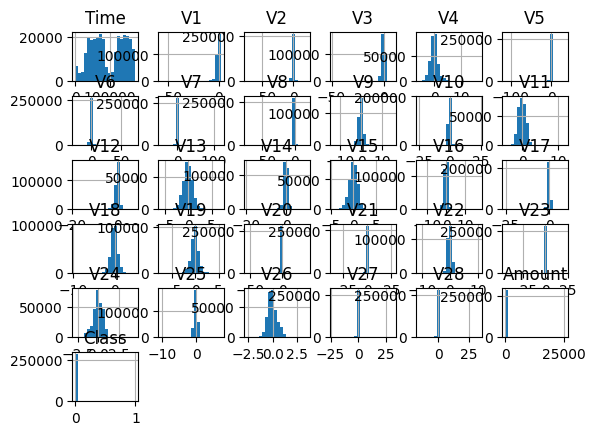

In [8]:
dataset_path = "creditcard.csv"

data = pd.read_csv(dataset_path)   
histogram = data.hist(bins=20)

data

### <span style="color: #40E0D0;">Visualizing Loaded Data</span>

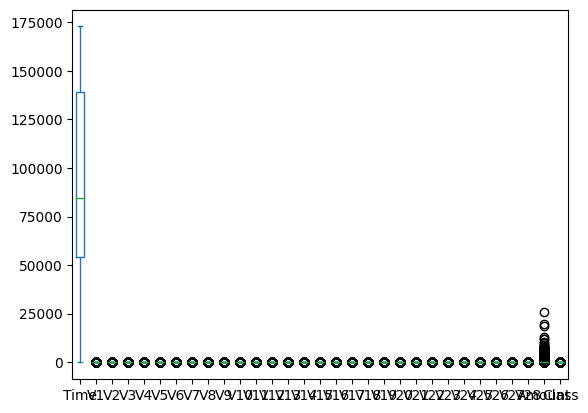

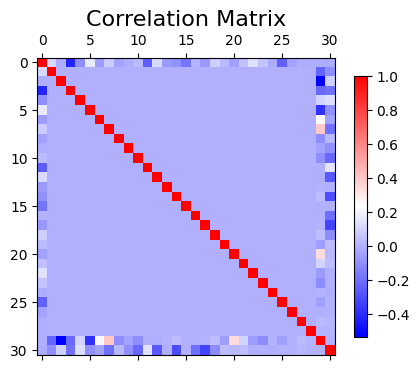

In [52]:
# 'Time' and 'Amount' are bigger than other features V1, ..., V28 values
data.plot.box()


# features V1, ..., V28 are not correlated as they are the principal components obtained with PCA
plt.matshow(data.corr(), cmap='bwr')
cb = plt.colorbar(shrink=0.7)
plt.title('Correlation Matrix', fontsize=16) 
plt.show()

## **Data Preprocessing**

The dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. </br>
The dataset is highly imbalanced, the positive class (fraud) accounts for 0.172% of all transactions.</br>
The model tends to be biased toward the majority (normal) class in case of the imbalanced data, leading to poor performance on the minority (fraud) class. </br>
Here are some strategies to address the issue of imbalanced data:

- __Resampling Techniques:__</br>
a. _Undersampling_: Randomly draw a subsample from the majority class to balance the dataset. </br>
    However, undersampling may lead to loss of information and can be problematic if the dataset is already small. </br>
b. _Oversampling_: Duplicating or creating synthetic samples for the minority class to increase its representation. </br>
    Techniques like SMOTE (Synthetic Minority Over-sampling Technique) generate synthetic samples by interpolating between existing samples.

- __Class Weighting:__</br>
Assigning higher weights to the minority class during model training to make it more influential. </br>
This ensures that the model pays more attention to the minority class and adjusts its decision boundary accordingly.

Choosing to apply an <span style="color: #40E0D0;">undersampling</span> technique...

### <span style="color: #40E0D0;">1. Separating Normal and Fraud Cases</span>

In [9]:
normal = data[data.Class==0] # Set of all normal (y = 0) cases
fraud = data[data.Class==1]  # Set of all fraud (y = 1) cases


num_normal = normal.shape[0] 
num_fraud = fraud.shape[0] 

print(f"Number of normal examples = {num_normal}")
print(f"Number of fraud examples = {num_fraud}\n")


ratio = num_normal/num_fraud
print(f'normal to fraud ratio in the whole data = {round(ratio,2)}')

Number of normal examples = 284315
Number of fraud examples = 492

normal to fraud ratio in the whole data = 577.88


### <span style="color: #40E0D0;">2. Sample Building by Choosing a Normal Fraud Ratio</span>

In [26]:
# A choice of normal_fraud_ratio has effects on precision and recall given below.

normal_fraud_ratio = 1                                      # normal_fraud_ratio = 1 means balance sample
normal_sample = normal.sample(normal_fraud_ratio*num_fraud) 

# Joining row-wise (axis=0) normal and fraud cases to get a sample 
sample = pd.concat([fraud, normal_sample], axis=0)  

# Convert to numpy array
sample = sample.to_numpy()

for i in range(100):
    sample = np.random.permutation(sample)                   # Random shuffling of sample examples 100 times
    
X, y = sample[:, :-1], sample[:, -1]

# Create and save the scaler instance as a global variable
global scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)            # This will put all the feature (X) values in the interval [0,1]

num_examples, num_features = X.shape   
print("number of examples = ", num_examples)
print("number of features = ", num_features)

X[:3,:], y[:3]                                 # Refer first 3 examples

number of examples =  984
number of features =  30


(array([[0.06893569, 0.78466846, 0.3757934 , 0.73650068, 0.62455062,
         0.59983102, 0.37863349, 0.7915315 , 0.68729964, 0.70047154,
         0.70584535, 0.54798495, 0.36251567, 0.56745695, 0.50198658,
         0.75213071, 0.42576687, 0.4774292 , 0.40678001, 0.5821196 ,
         0.25814034, 0.46896769, 0.53000169, 0.80431726, 0.56564494,
         0.5880375 , 0.29379182, 0.5750094 , 0.60615632, 0.01328699],
        [0.63463448, 0.91330514, 0.29747069, 0.95430676, 0.22867579,
         0.69441352, 0.56587869, 0.8943931 , 0.66809338, 0.86954797,
         0.82641321, 0.2626458 , 0.76918637, 0.70272477, 0.90093549,
         0.66400431, 0.82923238, 0.77343713, 0.81922997, 0.55784657,
         0.28081851, 0.44826237, 0.48306437, 0.75924183, 0.1479777 ,
         0.73542051, 0.12541965, 0.66705106, 0.39838662, 0.00492742],
        [0.43806355, 0.89567398, 0.28273979, 0.92113978, 0.27718661,
         0.74788636, 0.80311566, 0.88070757, 0.68655938, 0.76971383,
         0.8550409 , 0.18152214,

In [11]:
''' 
Zero padding is to make the number of features equal to a power of 2.
It is required for 'amplitude encoding' given below.
'''

n = int(np.ceil(np.log2(num_features)))
dim = 2**n
print(f'(number of qubits, dimension of the Hilbert space) = {(n, dim)}')

zeros = np.zeros((num_examples, dim-num_features))
X = np.append(X, zeros, axis=1)
num_examples, num_features = X.shape

num_examples, num_features = X.shape   
print("number of examples = ", num_examples)
print("number of features = ", num_features)

(number of qubits, dimension of the Hilbert space) = (5, 32)
number of examples =  984
number of features =  32


### <span style="color: #40E0D0;">3. Train-Test Split</span>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape)

(688, 32) (296, 32)


## **Quantum Machine Learning**

Use either angle or amplitude feature encoding </br>
__When the number of features is large (say, more than 6), use amplitude encoding__

### <span style="color: #40E0D0;">1a. Feature Map (FM): Angle Encoding</span>

In [13]:
fm = ZZFeatureMap(feature_dimension=num_features, reps=1)                   # ZZFeatureMap is more suited
fm.decompose().draw() 

┌───┐┌─────────────┐                                                »
 q_0: ┤ H ├┤ P(2.0*x[0]) ├───■────────────────────────────────────■────■──»
      ├───┤├─────────────┤ ┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
 q_1: ┤ H ├┤ P(2.0*x[1]) ├─┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
      ├───┤├─────────────┤ └───┘└──────────────────────────────┘└───┘┌─┴─┐»
 q_2: ┤ H ├┤ P(2.0*x[2]) ├───────────────────────────────────────────┤ X ├»
      ├───┤├─────────────┤                                           └───┘»
 q_3: ┤ H ├┤ P(2.0*x[3]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_4: ┤ H ├┤ P(2.0*x[4]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_5: ┤ H ├┤ P(2.0*x[5]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_6: ┤ H ├┤ P(2.0*x[6]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_7: ┤ H ├┤ P(2.0*x[7]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_8: ┤ H ├┤ P(2.0*x[8]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_9: ┤ H ├┤ P(2.0*x[9]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┴┐                                               »
q_10: ┤ H ├┤ P(2.0*x[10]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_11: ┤ H ├┤ P(2.0*x[11]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_12: ┤ H ├┤ P(2.0*x[12]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_13: ┤ H ├┤ P(2.0*x[13]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_14: ┤ H ├┤ P(2.0*x[14]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_15: ┤ H ├┤ P(2.0*x[15]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_16: ┤ H ├┤ P(2.0*x[16]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_17: ┤ H ├┤ P(2.0*x[17]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_18: ┤ H ├┤ P(2.0*x[18]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_19: ┤ H ├┤ P(2.0*x[19]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_20: ┤ H ├┤ P(2.0*x[20]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_21: ┤ H ├┤ P(2.0*x[21]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_22: ┤ H ├┤ P(2.0*x[22]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_23: ┤ H ├┤ P(2.0*x[23]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_24: ┤ H ├┤ P(2.0*x[24]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_25: ┤ H ├┤ P(2.0*x[25]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                           

### <span style="color: #40E0D0;">1b. Feature Map (FM): Amplitude Encoding</span>

__Zero padding given above is needed for this encoding__

In [18]:
fm = RawFeatureVector(feature_dimension=num_features) 
fm.draw() 

»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
«     ┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                 │
«q_1: ┤1                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                 │
«q_2: ┤2 Parameterizedinitialize(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9],x[10],x[11],x[12],x[13],x[14],x[15],x[16],x[17],x[18],x[19],x[20],x[21],x[22],x[23],x[24],x[25],x[26],x[27],x[28],x[29],x[30],x[31]) ├
«     │                                                                                                                                                                                                                 │
«q_3: ┤3                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                 │
«q_4: ┤4                                                                                                                                                                                                                ├
«     └─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

### <span style="color: #40E0D0;">2. Parameterized Quantum Circuit (PQC)</span>

In [16]:
'''
For angle encoding, num_qubits = num_features
For amplitude encoding, num_qubits = n = np.log2(num_features)
'''

pqc = RealAmplitudes(num_qubits=n, reps=3)
pqc.decompose().draw()

┌──────────┐                                          ┌──────────┐»
q_0: ┤ Ry(θ[0]) ├──────────────────────────────────■───────┤ Ry(θ[5]) ├»
     ├──────────┤                                ┌─┴─┐     ├──────────┤»
q_1: ┤ Ry(θ[1]) ├──────────────────────■─────────┤ X ├─────┤ Ry(θ[6]) ├»
     ├──────────┤                    ┌─┴─┐    ┌──┴───┴───┐ └──────────┘»
q_2: ┤ Ry(θ[2]) ├──────────■─────────┤ X ├────┤ Ry(θ[7]) ├──────■──────»
     ├──────────┤        ┌─┴─┐    ┌──┴───┴───┐└──────────┘    ┌─┴─┐    »
q_3: ┤ Ry(θ[3]) ├──■─────┤ X ├────┤ Ry(θ[8]) ├─────■──────────┤ X ├────»
     ├──────────┤┌─┴─┐┌──┴───┴───┐└──────────┘   ┌─┴─┐    ┌───┴───┴───┐»
q_4: ┤ Ry(θ[4]) ├┤ X ├┤ Ry(θ[9]) ├───────────────┤ X ├────┤ Ry(θ[14]) ├»
     └──────────┘└───┘└──────────┘               └───┘    └───────────┘»
«                               ┌───────────┐                          »
«q_0: ───────────────────■──────┤ Ry(θ[10]) ├───────────────────■──────»
«                      ┌─┴─┐    ├───────────┤                 ┌─┴─┐    »
«q_1: ──────■──────────┤ X ├────┤ Ry(θ[11]) ├──────■──────────┤ X ├────»
«         ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
«q_2: ────┤ X ├────┤ Ry(θ[12]) ├──────■──────────┤ X ├────┤ Ry(θ[17]) ├»
«     ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘»
«q_3: ┤ Ry(θ[13]) ├──────■──────────┤ X ├────┤ Ry(θ[18]) ├─────────────»
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘             »
«q_4: ─────────────────┤ X ├────┤ Ry(θ[19]) ├──────────────────────────»
«                      └───┘    └───────────┘                          »
«     ┌───────────┐
«q_0: ┤ Ry(θ[15]) ├
«     ├───────────┤
«q_1: ┤ Ry(θ[16]) ├
«     └───────────┘
«q_2: ─────────────
«                  
«q_3: ─────────────
«                  
«q_4: ─────────────
«

### <span style="color: #40E0D0;">3. Build the Model: [Variational Quantum Classifier (VQC)](https://qiskit.org/documentation/stable/0.19/stubs/qiskit.aqua.algorithms.VQC.html#qiskit.aqua.algorithms.VQC) with FM and PQC</span>


<a href="https://qiskit.org/documentation/apidoc/primitives.html" style="color: #40E0D0;">Sampler</a> class calculates probabilities or quasi-probabilities of bitstrings from quantum circuits.</br>
A sampler is initialized with an empty parameter set.</br> The sampler is used to create a JobV1, via the qiskit.primitives.Sampler.run() method, </br>and yields a SamplerResult object, which contains probabilities or quasi-probabilities of bitstrings, plus optional metadata like error bars in the samples.


In [19]:
# A callback that can access the intermediate data during the optimization
def callback(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

optimizer = COBYLA(maxiter=150)                 # maxiter = Maximum number of iterations (function evaluations)
sampler = Sampler()

objective_func_vals = []

vqc = VQC(
    sampler=sampler,
    feature_map=fm,
    ansatz=pqc,
    optimizer=optimizer,
    callback=callback,
)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24024\3091302636.py:11: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


### <span style="color: #40E0D0;">4. Training VQC</span>

In [20]:
%%time

'''Training time seems to increase with the number of features'''

vqc.fit(X_train, y_train)

CPU times: total: 7min 4s
Wall time: 7min 28s


### <span style="color: #40E0D0;">5. Performance Evaluation of Trained VQC</span>

In imbalanced datasets, accuracy alone is not a reliable performance metric. It can be misleading due to the dominance of the majority class. Instead, focus on evaluation metrics like precision, recall, F1-score, or area under the Receiver Operating Characteristic (ROC) curve, which provide a more comprehensive assessment of the model's performance on both classes.

More Area Under the Receiver Operating Characteristic Curve (__ROC AUC__) better classifier.

In [21]:
y_train_pred = vqc.predict(X_train)
y_test_pred = vqc.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred), "= confusion matrix for train set \n")

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred), "= confusion matrix for test set \n ")
print(round(roc_auc_score(y_test, y_test_pred),2), "= roc_auc_score for test set \n")

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88       340
         1.0       1.00      0.74      0.85       348

    accuracy                           0.87       688
   macro avg       0.90      0.87      0.87       688
weighted avg       0.90      0.87      0.87       688

[[340   0]
 [ 90 258]] = confusion matrix for train set 

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       152
         1.0       1.00      0.74      0.85       144

    accuracy                           0.88       296
   macro avg       0.90      0.87      0.87       296
weighted avg       0.90      0.88      0.87       296

[[152   0]
 [ 37 107]] = confusion matrix for test set 
 
0.87 = roc_auc_score for test set 



In [27]:
# Save the trained model components and scaler
import joblib
import os
import json
import numpy as np

# Create a models directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Check if scaler exists before saving
if 'scaler' in globals():
    # Save the scaler
    joblib.dump(scaler, 'models/scaler.joblib')
    print("Scaler saved successfully!")
else:
    print("Warning: Scaler not found. Make sure to run the data preprocessing cell first.")

# Save the model parameters and configuration
model_config = {
    'feature_map_config': {
        'feature_dimension': fm.num_qubits,
        'reps': getattr(fm, 'reps', 1)
    },
    'ansatz_config': {
        'num_qubits': pqc.num_qubits,
        'reps': getattr(pqc, 'reps', 1)
    },
    'trained_weights': vqc.weights.tolist() if vqc.weights is not None else None
}

# Save the configuration
with open('models/model_config.json', 'w') as f:
    json.dump(model_config, f)

print("Model configuration saved successfully!")

Scaler saved successfully!
Model configuration saved successfully!


### Loading and Using the Saved Model
Here's how you can load and use the saved model in your website or application:

In [29]:
# Example code for loading and using the model
import joblib
import json
import numpy as np
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import COBYLA

def load_model():
    # Load the configuration
    with open('models/model_config.json', 'r') as f:
        config = json.load(f)
    
    # Load the scaler
    scaler = joblib.load('models/scaler.joblib')
    
    # Reconstruct the feature map and ansatz
    fm = RawFeatureVector(feature_dimension=config['feature_map_config']['feature_dimension'])
    pqc = RealAmplitudes(num_qubits=config['ansatz_config']['num_qubits'], 
                        reps=config['ansatz_config']['reps'])
    
    # Reconstruct the VQC
    model = VQC(
        sampler=Sampler(),
        feature_map=fm,
        ansatz=pqc,
        optimizer=COBYLA()
    )
    
    # Set the trained weights
    if config['trained_weights'] is not None:
        model.weights = np.array(config['trained_weights'])
    
    return model, scaler

def predict_fraud(transaction_data):
    """
    Make fraud predictions on new transaction data
    
    Args:
        transaction_data: numpy array or pandas DataFrame with the same features as training data
    
    Returns:
        prediction: 0 for normal transaction, 1 for fraudulent
    """
    # Load model and scaler
    model, scaler = load_model()
    
    # Scale the input data
    scaled_data = scaler.transform(transaction_data)
    
    # Make prediction
    prediction = model.predict(scaled_data)
    
    return prediction

# Example usage:
# sample_transaction = ... # Your transaction data
# result = predict_fraud(sample_transaction)
# print("Transaction is", "fraudulent" if result == 1 else "normal")

## **Classical Machine Learning Models**
Run using <span style="color: #40E0D0;">scikit-learn</span> library to run classical models</br>
The evaluation of each model is subsequently displayed

In [22]:
%%time
warnings.filterwarnings('ignore')

def train_test(ML_model):
    print(20*' ', ML_model,'\n')
    ML_model.fit(X_train, y_train)                          # fit model
    
    y_train_pred = ML_model.predict(X_train)       # predict with the trained model
    y_test_pred = ML_model.predict(X_test)
    
    
    print(classification_report(y_train, y_train_pred))     # evaluate model performance 
    print(confusion_matrix(y_train, y_train_pred), "= confusion matrix for train set \n")

    print(classification_report(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred), "= confusion matrix for test set \n")
    print(round(roc_auc_score(y_test, y_test_pred),2), "= roc_auc_score for test set \n")
    
    print(70*'=')
    

#----------------------------------------------------------------------------------

print(70*'=')
ML_model = linear_model.LogisticRegression()            # create model instance
train_test(ML_model)


ML_model = MLPClassifier()                            
train_test(ML_model)


ML_model = svm.SVC() 
train_test(ML_model)


ML_model = RandomForestClassifier()
train_test(ML_model)

                     LogisticRegression() 

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       340
         1.0       1.00      0.86      0.93       348

    accuracy                           0.93       688
   macro avg       0.94      0.93      0.93       688
weighted avg       0.94      0.93      0.93       688

[[340   0]
 [ 47 301]] = confusion matrix for train set 

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       152
         1.0       0.99      0.86      0.92       144

    accuracy                           0.93       296
   macro avg       0.94      0.93      0.93       296
weighted avg       0.94      0.93      0.93       296

[[151   1]
 [ 20 124]] = confusion matrix for test set 

0.93 = roc_auc_score for test set 

                     MLPClassifier() 

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       340
   